# Inventariador y clasificador de dispositivos electronicos

## Integrantes:
<ul>
    <li>Brayan Calderón<\li>
    <li>Daniel Delgado<\li>
    <li>Mateo Rodriguez<\li>
<\ul>

## Resumen
En el presente documento se presenta el proceso de automatización en el inventariado de diferentes elementos electrónicos mediante el uso de técnicas de inteligencia artificial, más específicamente visión de máquina. La implementación de este proyecto se ejecutará en el establecimiento Sonido B&J ubicado en la ciudad de Valledupar-Colombia.
<p align = "center">
    <img src="Imagenes/1.png">
<\p>


## Planteamiento y justificación del problema
El establecimiento Sonido B&J abastece su inventario constantemente por medio de proveedores que entregan la mercancía en cajas. Esta mercancía se encuentra sin clasificar, además durante las actividades comerciales del establecimiento es común que elementos se mezclen. Por todo lo anterior es necesario que una persona se encargue de clasificar y contar cada uno de los elementos. 
## Objetivos
### Objetivos generales
<ul>
    <li>Diseñar un software capaz de reconocer, clasificar y cuantificar diferentes elementos electrónicos que se disponen en el establecimiento <\li>
<\ul>


### Objetivos especificos
<ul>
    <li>Diseñar un software capaz de reconocer, clasificar y cuantificar diferentes elementos electrónicos que se disponen en el establecimiento <\li>
        <li>Crear una base de datos lo suficientemente grande para poder identificar, segmentar y clasificar los elementos en casos de la vida real. <\li>
            <li>Extraer y resaltar las características particulares de cada elemento. 
 <\li>
     <li>Segmentar cada uno de los elementos.<\li>
         <li>Diseñar e implementar un algoritmo clasificador con el mínimo error admisible <\li>
<\ul>


## Alcance
Debido a la escalabilidad del proyecto y a la gran gama de elementos electrónicos que existen en el mercado, se limitará el desarrollo del algoritmo a elementos de tipo switch. El sistema desarrollado será utilizado para evaluar la viabilidad de la implementación para un mayor alcance en el establecimiento.
## Preprocesamiento de Imagenes

In [ ]:

import numpy as np
import cv2
from matplotlib import pyplot as plt


# Recortar Imagenes y guardar en nuevo path

In [16]:
import cv2
from os import scandir

# Función para realizar el crop de las imagenes
def cropfile(pathin,pathout, x, y, w, h,ws):
    img = cv2.imread(pathin)
    crop_img = img[y:y+h, x:x+w]
    if ws:
        cv2.imwrite(pathout, crop_img)
    else:
        test_images.append(crop_img)
    
#Función para encontrar todas las imagenes que están en un directorio    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

#Función para separar el nombre del archivo
def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

#Arreglo de imagenes de prueba
test_images = []

for i in range(1,4):
    path = "Imagenes/Switch"+str(i)+"/"
    #Files es un arreglo con todos los nombres de las imagenes que están dentro del path
    files=ls1(path)
    for file in files:
        # Es el path + el nombre de la imagen
        filea=path + file # archivo original
        #sext es la extensión y sfilename y es el nombre del archivo sin la extensión
        sext, sfilename = splitfilename(file)    
        #creación del path de archivo ya con el crop
        filec=path+"crop/" + sfilename + "_crop" + ".png" # archivo crop    
        print(filec)
        #path de imagen, path de imagen crop, tamaño de crop
        cropfile(filea, filec, 250, 90, 300,200,1)
    cropfile(path+files[0],filec,250,90,300,200,0)

    


Imagenes/Switch1/crop/1_crop.png
Imagenes/Switch1/crop/2_crop.png
Imagenes/Switch1/crop/3_crop.png
Imagenes/Switch1/crop/4_crop.png
Imagenes/Switch1/crop/5_crop.png
Imagenes/Switch1/crop/6_crop.png
Imagenes/Switch1/crop/7_crop.png
Imagenes/Switch1/crop/8_crop.png
Imagenes/Switch1/crop/9_crop.png
Imagenes/Switch2/crop/1_crop.png
Imagenes/Switch2/crop/2_crop.png
Imagenes/Switch2/crop/3_crop.png
Imagenes/Switch2/crop/4_crop.png
Imagenes/Switch2/crop/5_crop.png
Imagenes/Switch2/crop/6_crop.png
Imagenes/Switch2/crop/7_crop.png
Imagenes/Switch2/crop/8_crop.png
Imagenes/Switch2/crop/9_crop.png
Imagenes/Switch3/crop/1_crop.png
Imagenes/Switch3/crop/10_crop.png
Imagenes/Switch3/crop/11_crop.png
Imagenes/Switch3/crop/12_crop.png
Imagenes/Switch3/crop/13_crop.png
Imagenes/Switch3/crop/2_crop.png
Imagenes/Switch3/crop/3_crop.png
Imagenes/Switch3/crop/4_crop.png
Imagenes/Switch3/crop/5_crop.png
Imagenes/Switch3/crop/6_crop.png
Imagenes/Switch3/crop/7_crop.png
Imagenes/Switch3/crop/8_crop.png
Imagen

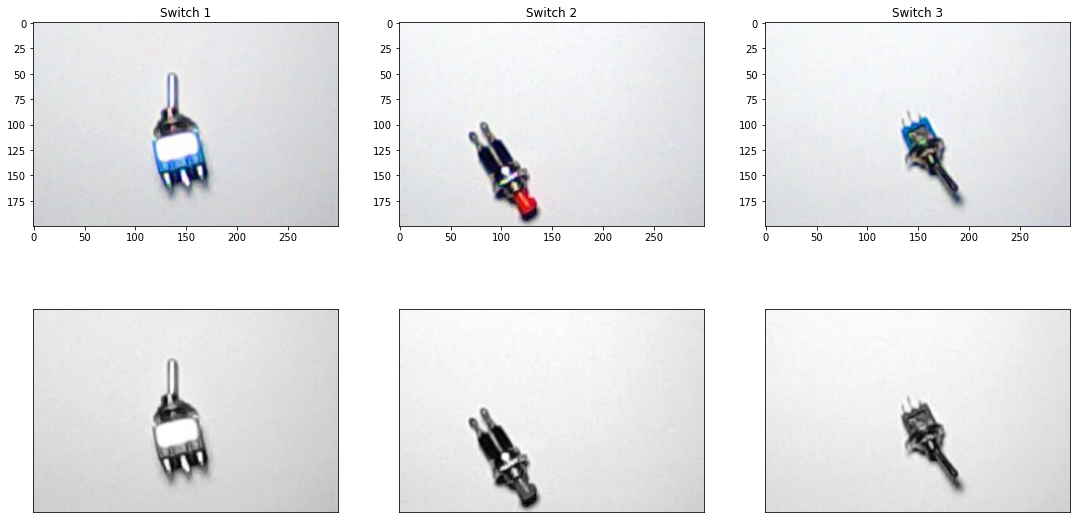

In [81]:
j = 4
gray_images = []
color_images = []
for i in range(len(test_images)):    
        image = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2RGB )
        image2 = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2GRAY)
        gray_images.append(image2)
        color_images.append(image)
        plt.subplot(2,3,i+1), plt.imshow(image, cmap=plt.cm.gray)
        titles = ["Switch 1","Switch 2","Switch 3"]
        plt.title(titles[i])
        plt.subplot(2,3,j), plt.imshow(image2, cmap=plt.cm.gray)   
        j +=1
        plt.xticks([]),plt.yticks([])
        plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=2.5, hspace=0.1, wspace=0.2)
plt.show()

# Binary Tresh

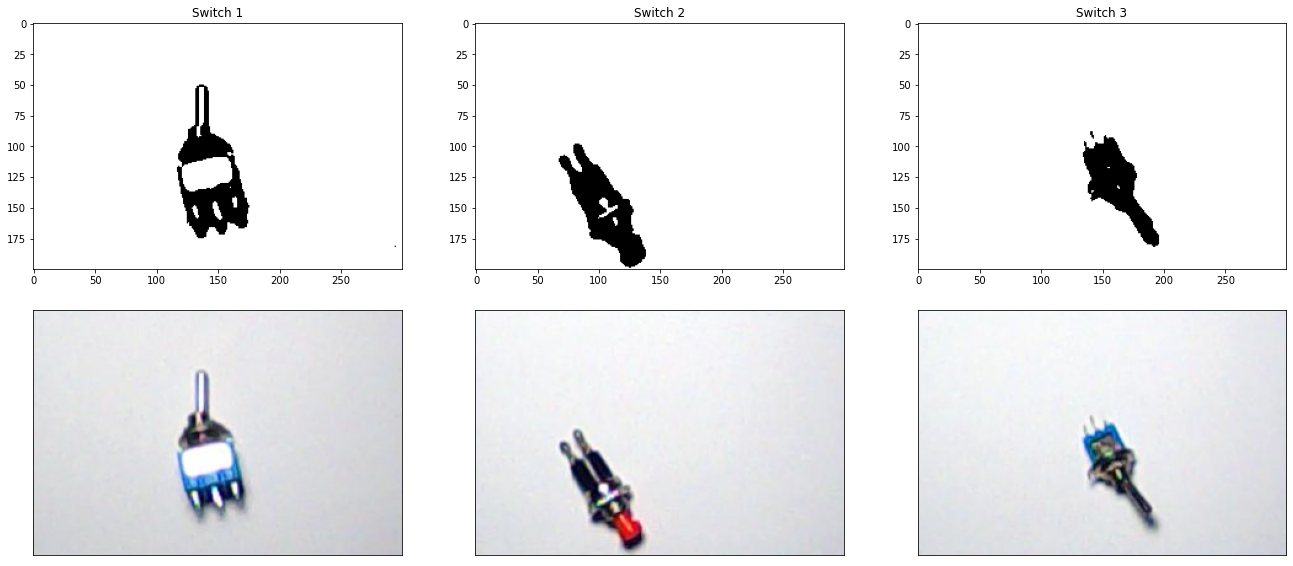

In [84]:
j = 4
for i in range(len(gray_images)):
    ret,thresh1 = cv2.threshold(gray_images[i],190,255,cv2.THRESH_BINARY)
    plt.subplot(2,3,i+1),plt.imshow(thresh1,'gray',vmin=0,vmax=255)
    titles = ["Switch 1","Switch 2","Switch 3"]
    plt.title(titles[i])
    plt.subplot(2,3,j),plt.imshow(color_images[i],'gray',vmin=0,vmax=255)
    j +=1
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)


# Adaptative Mean Tresholding

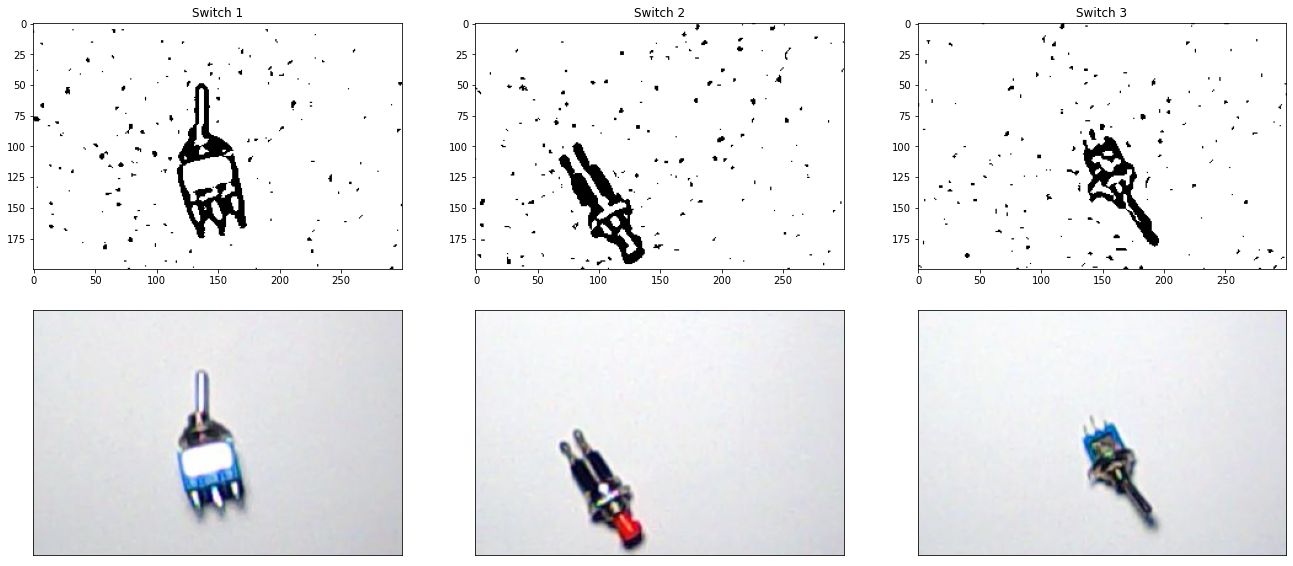

In [65]:
j = 4
for i in range(len(gray_images)):
    img = cv2.medianBlur(gray_images[i],5)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
    plt.subplot(2,3,i+1),plt.imshow(th2,'gray',vmin=0,vmax=255)
    titles = ["Switch 1", "Switch 2", "Switch 3"]
    plt.title(titles[i])
    plt.subplot(2,3,j),plt.imshow(color_images[i],'gray',vmin=0,vmax=255)
    j +=1
    plt.xticks([]),plt.yticks([])
    
    plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
    

# Adaptative Gaussian Treshold

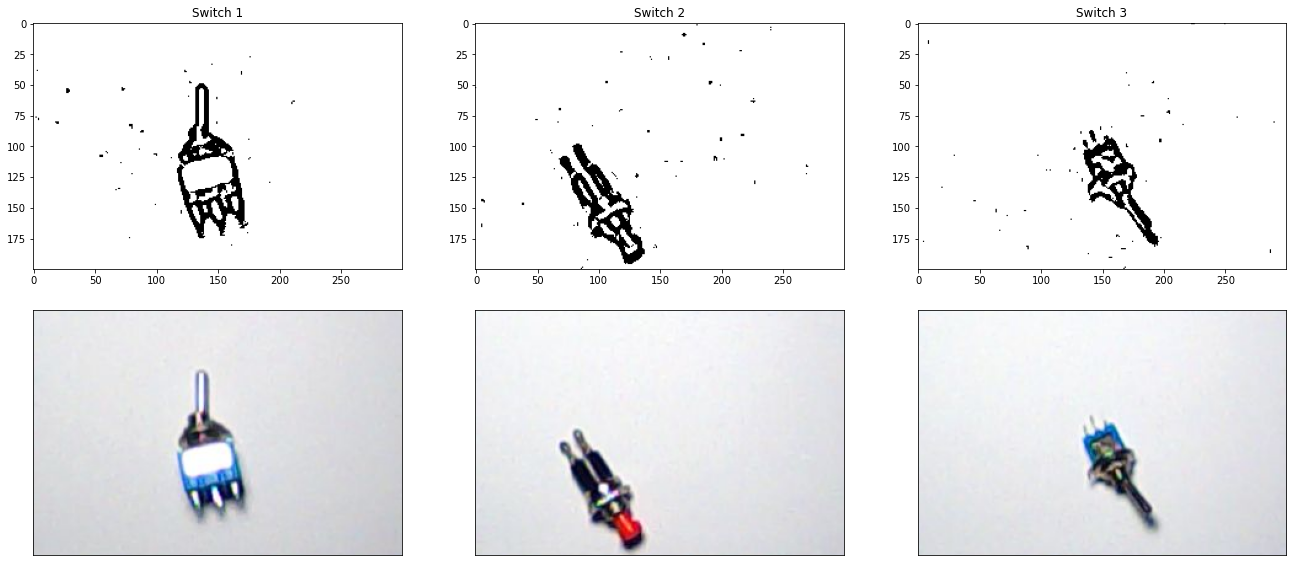

In [67]:
j = 4
gaussian_images = []
for i in range(len(gray_images)):
    img = cv2.medianBlur(gray_images[i],5)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    gaussian_images.append(th2)
    plt.subplot(2,3,i+1),plt.imshow(th2,'gray',vmin=0,vmax=255)
    titles = ["Switch 1", "Switch 2", "Switch 3"]
    plt.title(titles[i])
    plt.subplot(2,3,j),plt.imshow(color_images[i],'gray',vmin=0,vmax=255)
    j +=1
    plt.xticks([]),plt.yticks([])
    
    plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

# Salt and Pepper Filter

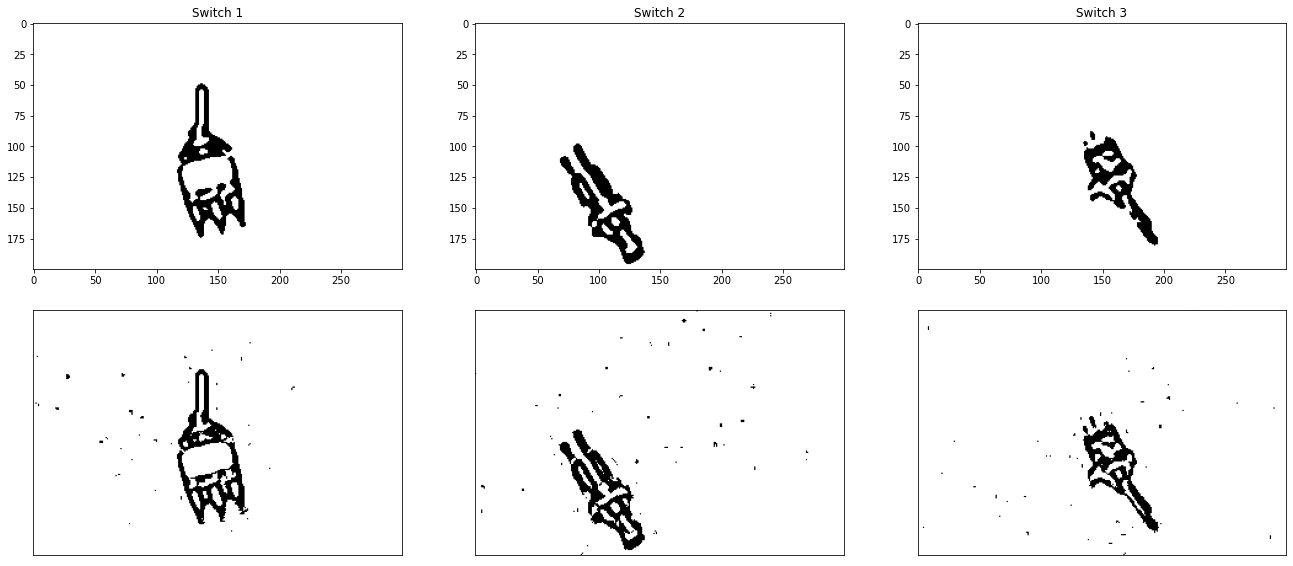

In [72]:
j = 4
for i in range(len(gaussian_images)):
    blur= cv2.medianBlur(gaussian_images[i], 5)
    plt.subplot(2,3,i+1),plt.imshow(blur,'gray',vmin=0,vmax=255)
    titles = ["Switch 1", "Switch 2", "Switch 3"]
    plt.title(titles[i])
    plt.subplot(2,3,j),plt.imshow(gaussian_images[i],'gray',vmin=0,vmax=255)
    j +=1
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
plt.show()

# Escenario Posible

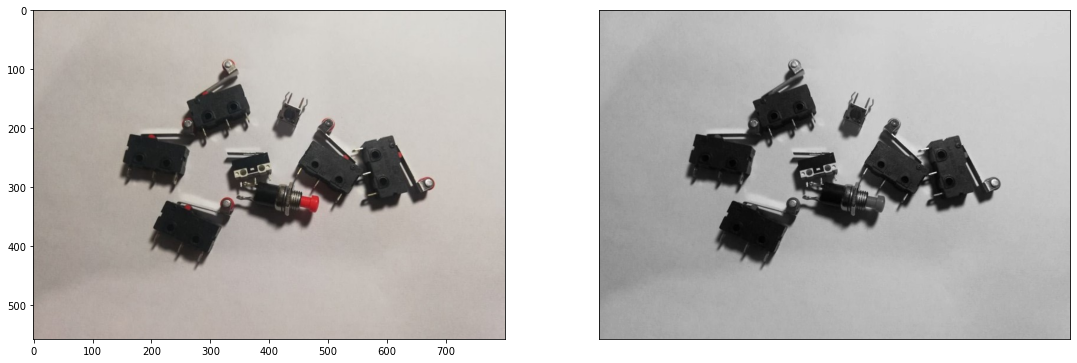

In [88]:
ima1 = cv2.imread('Imagenes/Escenarios/1.jpg',1)
image = cv2.cvtColor(ima1, cv2.COLOR_BGR2RGB )
image2 = cv2.cvtColor(ima1, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1), plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(1,2,2), plt.imshow(image2, cmap=plt.cm.gray)   
plt.xticks([]),plt.yticks([])
plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=2.5, hspace=0.1, wspace=0.2)
plt.show()


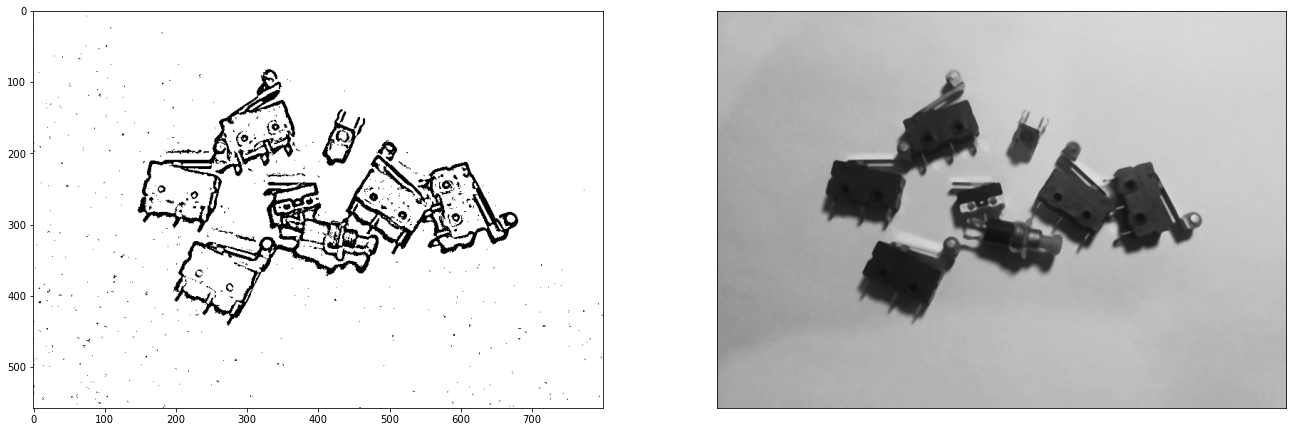

In [92]:
img = cv2.medianBlur(image2,5)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.subplot(1,2,1),plt.imshow(th2,'gray',vmin=0,vmax=255)
plt.subplot(1,2,2),plt.imshow(img,'gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])    
plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

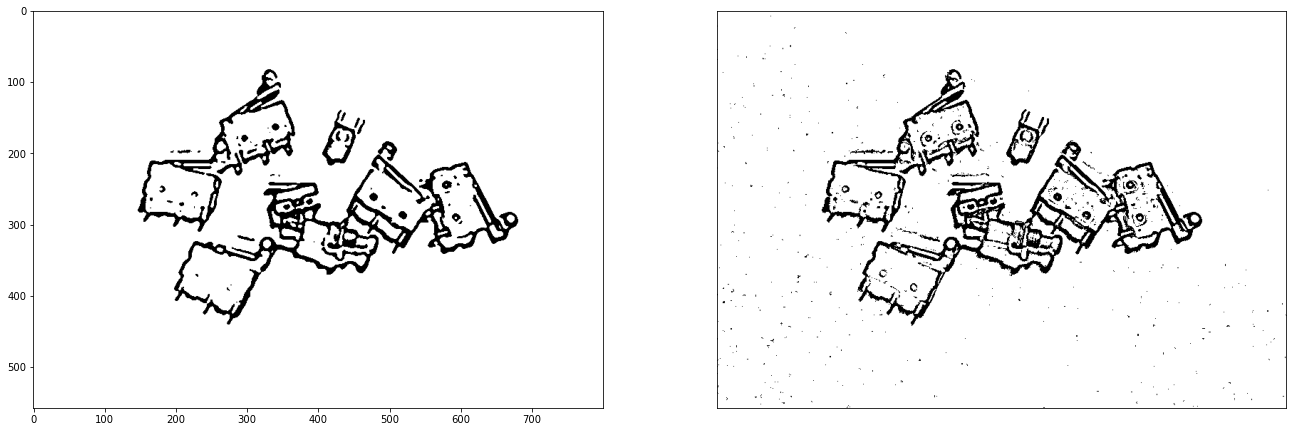

In [94]:
blur= cv2.medianBlur(th2, 5)
plt.subplot(1,2,1),plt.imshow(blur,'gray',vmin=0,vmax=255)
plt.subplot(1,2,2),plt.imshow(th2,'gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])
plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
plt.show()

Problemas con este escenario: Iluminación no permite aplicar los filtros de manera correcta ya que las sombras se están colando dentro de las formas.
Al ser una imagen con mayor resolución, no permite comparar realmente el proceso